In [1]:
import warnings
import pandas as pd
import numpy as np
import astropy.units as u
from matplotlib import pyplot, colors
from astropy.coordinates import SkyCoord
from astropy.coordinates.angle_utilities import angular_separation
from gammapy.stats import WStatCountsStatistic
from utils import merge_hdf_files, calc_angular_separation, calc_nsim, crab_magic

In [2]:
pyplot.rcParams['figure.figsize'] = (12, 9)
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['grid.linestyle'] = ':'

color_cycle = pyplot.rcParams['axes.prop_cycle'].by_key()['color']
warnings.simplefilter('ignore')

# Load real data

In [3]:
# === setting ===
data_mask = '../2020_*_1[5, 8]/4.dl1_to_dl2/data/dl2/merged/*.h5'

# === main ===
data_stereo = merge_hdf_files(data_mask, n_files=5)
data_stereo.sort_index(inplace=True)

n_events_total = len(data_stereo.groupby(['obs_id', 'event_id']).size()) 
print(f'\nIn total {n_events_total} stereo events are found.') 

print('\nEvents with 2 tels info:')

tel_ids_dict = {
    'LST-1 + MAGIC-I': [1, 2],
    'LST-1 + MAGIC-II': [1, 3],
    'MAGIC-I + MAGIC-II': [2, 3]
}

for tel_name, tel_ids, in zip(tel_ids_dict.keys(), tel_ids_dict.values()):
    
    df = data_stereo.query(f'(tel_id == {list(tel_ids)}) & (multiplicity == 2)')
    n_events = np.sum(df.groupby(['obs_id', 'event_id']).size().values == 2)
    print(f'{tel_name}: {n_events} events ({n_events/n_events_total*100:.1f}%)')
    
print('\nEvents with 3 tels info:')

n_events = len(data_stereo.query(f'multiplicity == 3').groupby(['obs_id', 'event_id']).size())
print(f'LST-1 + MAGIC-I + MAGIC-II: {n_events:.0f} events ({n_events/n_events_total*100:.1f}%)')


Merging the input data to subsets...
../2020_11_18/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run02923.h5
../2020_11_18/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run02924.h5
../2020_12_15/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03265.h5
../2020_12_15/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03266.h5
../2020_12_15/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03267.h5
--> ../2020_11_18/4.dl1_to_dl2/data/dl2/merged/subset_dl2_lst1_magic_Run02923_to_dl2_lst1_magic_Run03267.h5

../2020_12_15/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03268.h5
--> ../2020_11_18/4.dl1_to_dl2/data/dl2/merged/subset_dl2_lst1_magic_Run03268_to_dl2_lst1_magic_Run03268.h5

Merging the subset data:
../2020_11_18/4.dl1_to_dl2/data/dl2/merged/subset_dl2_lst1_magic_Run02923_to_dl2_lst1_magic_Run03267.h5
../2020_11_18/4.dl1_to_dl2/data/dl2/merged/subset_dl2_lst1_magic_Run03268_to_dl2_lst1_magic_Run03268.h5

In total 943366 stereo events are found.

Events with 2 tels info:
LST-1 + MAGIC-I: 89823 

In [4]:
data_stereo.head()

obs_id_lst  event_id_lst   intensity         x  \
obs_id  event_id tel_id                                                   
5093174 2122     1           2923.0     2054288.0  307.962953 -0.315250   
                 2           2923.0     2054288.0  108.671875  0.027797   
        2126     1           2923.0     2054414.0  174.241061  0.010928   
                 2           2923.0     2054414.0  176.444987  0.319373   
        2130     1           2923.0     2054693.0  646.928410 -0.682803   

                                y         r         phi    length     width  \
obs_id  event_id tel_id                                                       
5093174 2122     1       0.533384  0.619582  120.584658  0.153488  0.051308   
                 2       0.335385  0.336535   85.262067  0.085343  0.017875   
        2126     1      -0.131373  0.131827  -85.244971  0.101673  0.049368   
                 2       0.086378  0.330847   15.134165  0.092057  0.019301   
        2130     1       0.063893  0.685786  174.654160  0.138337  0.056016   

                               psi  ...     ra_tel    dec_tel    ra_reco  \
obs_id  event_id tel_id             ...                                    
5093174 2122     1      -31.610509  ...  83.963124  22.247049  83.346973   
                 2      -25.261473  ...  83.967988  22.245614  82.422005   
        2126     1       10.226202  ...  83.963123  22.247052  82.932625   
                 2       53.087812  ...  83.967990  22.245614  82.050592   
        2130     1       39.110881  ...  83.963122  22.247059  84.332838   

                          dec_reco  ra_reco_mean  dec_reco_mean  \
obs_id  event_id tel_id                                           
5093174 2122     1       22.009114     84.866105      20.106463   
                 2       22.145910     84.866105      20.106463   
        2126     1       22.660566     83.160144      22.706243   
                 2       21.856361     83.160144      22.706243   
        2130     1       21.326110     84.446739      21.245125   

                         event_class_0  event_class_1  event_class_0_mean  \
obs_id  event_id tel_id                                                     
5093174 2122     1            0.135700       0.864300            0.131926   
                 2            0.128152       0.871848            0.131926   
        2126     1            0.012250       0.987750            0.013304   
                 2            0.014359       0.985641            0.013304   
        2130     1            0.395065       0.604935            0.672623   

                         event_class_1_mean  
obs_id  event_id tel_id                      
5093174 2122     1                 0.868074  
                 2                 0.868074  
        2126     1                 0.986696  
                 2                 0.986696  
        2130     1                 0.327377  

[5 rows x 53 columns]

# Arrange the data frame

In [5]:
params = ['ra_tel', 'dec_tel', 'ra_reco_mean', 'dec_reco_mean', 
          'energy_reco_mean', 'event_class_0_mean', 'multiplicity', 'timestamp']

dl2_real = data_stereo.groupby(['obs_id', 'event_id']).mean()[params]
dl2_real.query('multiplicity == 3', inplace=True)

print(f'DL2 data frame: {len(dl2_real)} events')

DL2 data frame: 551561 events


In [6]:
dl2_real.head()

ra_tel    dec_tel  ra_reco_mean  dec_reco_mean  \
obs_id  event_id                                                      
5093174 2130      83.966938  22.246320     84.446739      21.245125   
        2132      83.966939  22.246320     82.936126      22.439017   
        2134      83.966939  22.246321     84.532000      22.225370   
        2136      83.966939  22.246322     85.523416      22.437677   
        2140      83.966940  22.246323     83.865117      20.500403   

                  energy_reco_mean  event_class_0_mean  multiplicity  \
obs_id  event_id                                                       
5093174 2130              0.466137            0.672623           3.0   
        2132              0.801209            0.180159           3.0   
        2134              0.185542            0.013661           3.0   
        2136              0.359361            0.512400           3.0   
        2140              3.255779            0.000881           3.0   

                     timestamp  
obs_id  event_id                
5093174 2130      1.605743e+09  
        2132      1.605743e+09  
        2134      1.605743e+09  
        2136      1.605743e+09  
        2140      1.605743e+09

# Check observation time

In [7]:
obs_time = 0

obs_ids_list = np.unique(dl2_real.index.get_level_values('obs_id'))

for obs_id in obs_ids_list:
    
    timestamps = dl2_real.query(f'obs_id == {obs_id}')['timestamp'].values
    obs_time += (timestamps[-1] - timestamps[0]) * u.s
    
print(f'Total observation time: {obs_time.to(u.min):.1f}')

Total observation time: 91.6 min


# Calculate angular separation

In [8]:
# === settings ===
source_name = 'Crab'
n_off_region = 3

# === main ===
on_coord = SkyCoord.from_name(source_name)
on_coord = on_coord.transform_to('icrs')

for obs_id in obs_ids_list:
    
    print(f'obs_id = {obs_id}')
    
    df_obs = dl2_real.query(f'obs_id == {obs_id}')
    
    event_coords = SkyCoord(
        ra=df_obs['ra_reco_mean'].values*u.deg, dec=df_obs['dec_reco_mean'].values*u.deg, frame='icrs'
    )
    
    tel_coords = SkyCoord(
        ra=df_obs['ra_tel'].values*u.deg, dec=df_obs['dec_tel'].values*u.deg, frame='icrs'
    )
    
    # --- calculate the angular separation ---
    theta_on, theta_off, off_coords = calc_angular_separation(
        on_coord, event_coords, tel_coords, n_off_region
    )
    
    dl2_real.loc[(obs_id, slice(None)), 'theta2_on'] = theta_on.to(u.deg).value**2
    
    for i_off in theta_off.keys():
        dl2_real.loc[(obs_id, slice(None)), f'theta2_off{i_off}'] = theta_off[i_off].to(u.deg).value**2
        

obs_id = 5093174
mean_offset = 0.387 [deg], mean_rot = 36.8 [deg]
obs_id = 5093175
mean_offset = 0.409 [deg], mean_rot = 213.6 [deg]
obs_id = 5093711
mean_offset = 0.386 [deg], mean_rot = 37.1 [deg]
obs_id = 5093712
mean_offset = 0.411 [deg], mean_rot = 213.5 [deg]
obs_id = 5093713
mean_offset = 0.388 [deg], mean_rot = 36.7 [deg]
obs_id = 5093714
mean_offset = 0.408 [deg], mean_rot = 213.6 [deg]


# Load MC data

In [9]:
# === settings ===
path = '/home/yoshiki.ohtani/combined_analysis/mc/LST-1_MAGIC/zd40deg_az90deg/4.dl1_to_dl2/data/dl2/' \
        'dl2_lst1_magic_gamma_40deg_90deg_off0.4.h5'

nshow_sim = 20000
nscat_sim = 10
eslope_sim = -2
emin_sim = u.Quantity(0.005, u.TeV)
emax_sim = u.Quantity(50, u.TeV)
cscat_sim = u.Quantity(600e2, u.cm)
viewcone_sim = u.Quantity(0, u.deg)

# === main ===
print(f'Loading the input data file: {path}')

data_mc = pd.read_hdf(path, key='events/params')
data_mc.sort_index(inplace=True)

n_events = len(data_mc.groupby(['obs_id', 'event_id']).size())
print(f'\nNumber of events = {n_events}')

n_runs = len(np.unique(data_mc.index.get_level_values('obs_id')))
print(f'Number of runs = {n_runs}')

n_events_sim = nshow_sim * nscat_sim * n_runs

Loading the input data file: /home/yoshiki.ohtani/combined_analysis/mc/LST-1_MAGIC/zd40deg_az90deg/4.dl1_to_dl2/data/dl2/dl2_lst1_magic_gamma_40deg_90deg_off0.4.h5

Number of events = 754482
Number of runs = 750


In [10]:
data_mc.head()

mc_energy    mc_alt     mc_az  mc_core_x   mc_core_y  \
obs_id event_id tel_id                                                         
251    702      1        0.229992  0.872665  1.570796 -73.184334  149.846039   
                2        0.229992  0.872665  1.570796 -73.184334  149.846039   
                3        0.229992  0.872665  1.570796 -73.184334  149.846039   
       704      1        0.229992  0.872665  1.570796  27.037651  116.793365   
                2        0.229992  0.872665  1.570796  27.037651  116.793365   

                         mc_impact   alt_tel    az_tel  n_islands   intensity  \
obs_id event_id tel_id                                                          
251    702      1        70.886188  0.865683  1.570796          1  618.928799   
                2       176.636320  0.865683  1.570796          1  132.795179   
                3       107.238835  0.865683  1.570796          1  200.480384   
       704      1        35.234668  0.865683  1.570796          1  536.370267   
                2       111.546053  0.865683  1.570796          1  178.386114   

                        ...   az_reco  disp_reco  disp_reco_err  \
obs_id event_id tel_id  ...                                       
251    702      1       ...  1.572191   0.007943       0.001335   
                2       ...  1.572614   0.014924       0.001291   
                3       ...  1.580289   0.010221       0.001209   
       704      1       ...  1.570595   0.005059       0.000841   
                2       ...  1.571435   0.013532       0.001279   

                        pos_angle_shift_reco  az_reco_mean  alt_reco_mean  \
obs_id event_id tel_id                                                      
251    702      1                   0.950222      1.572564       0.871542   
                2                   0.823973      1.572564       0.871542   
                3                   0.161127      1.572564       0.871542   
       704      1                   0.907840      1.571360       0.869967   
                2                   0.507746      1.571360       0.869967   

                        event_class_0  event_class_1  event_class_0_mean  \
obs_id event_id tel_id                                                     
251    702      1            0.899021       0.100979            0.931934   
                2            0.971834       0.028166            0.931934   
                3            0.924947       0.075053            0.931934   
       704      1            0.968834       0.031166            0.901653   
                2            0.878119       0.121881            0.901653   

                        event_class_1_mean  
obs_id event_id tel_id                      
251    702      1                 0.068066  
                2                 0.068066  
                3                 0.068066  
       704      1                 0.098347  
                2                 0.098347  

[5 rows x 52 columns]

In [11]:
print('Applying the quality cuts...')

data_mc.query('intensity > 50', inplace=True)
data_mc['multiplicity'] = data_mc.groupby(['obs_id', 'event_id']).size()
data_mc.query('multiplicity == 3', inplace=True)

n_events = len(data_mc.groupby(['obs_id', 'event_id']).size())
print(f'--> Number of events = {n_events}')

Applying the quality cuts...
--> Number of events = 689883


In [12]:
print('Making the DL2 data frame...')

params = ['mc_az', 'mc_alt', 'az_reco_mean', 'alt_reco_mean', 
          'mc_energy', 'energy_reco_mean', 'event_class_0_mean']

dl2_mc = data_mc.groupby(['obs_id', 'event_id']).mean()[params]

theta = angular_separation(
    lon1=dl2_mc['mc_az'].values*u.rad, lat1=dl2_mc['mc_alt'].values*u.rad,
    lon2=dl2_mc['az_reco_mean'].values*u.rad, lat2=dl2_mc['alt_reco_mean'].values*u.rad,
)

dl2_mc['theta2_on'] = theta.to(u.deg).value**2

Making the DL2 data frame...


In [13]:
dl2_mc.head()

mc_az    mc_alt  az_reco_mean  alt_reco_mean  mc_energy  \
obs_id event_id                                                               
251    702       1.570796  0.872665      1.572564       0.871542   0.229992   
       704       1.570796  0.872665      1.571360       0.869967   0.229992   
       2604      1.570796  0.872665      1.571299       0.870796   0.658221   
       2605      1.570796  0.872665      1.573162       0.871151   0.658221   
       3103      1.570796  0.872665      1.570662       0.871845   0.171554   

                 energy_reco_mean  event_class_0_mean  theta2_on  
obs_id event_id                                                   
251    702               0.248727            0.931934   0.008386  
       704               0.182304            0.901653   0.024316  
       2604              0.411196            0.791582   0.011804  
       2605              0.734688            0.819679   0.015130  
       3103              0.168722            0.918742   0.002229

# Check spectrum

### Function to find cuts to maximize the significance:

In [14]:
def get_best_cuts_signif(data, bins_eng, bins_gam_cut, bins_t2_cut):
    
    print('Checking parameter cuts to maximize the significance...')
    
    n_bins_gam_cut = len(bins_gam_cut)
    n_bins_t2_cut = len(bins_t2_cut)

    bins_gam_cut = np.repeat(bins_gam_cut, n_bins_t2_cut)
    bins_t2_cut = np.tile(bins_t2_cut, n_bins_gam_cut)
    
    gam_cuts_best = np.array([])
    t2_cuts_best = np.array([])

    for eng_lo, eng_hi in zip(bins_eng[:-1], bins_eng[1:]):
        
        df = data.query(f'(energy_reco_mean > {eng_lo}) & (energy_reco_mean < {eng_hi})')
    
        signifs_list = np.array([])

        for gam_cut, t2_cut in zip(bins_gam_cut, bins_t2_cut):

            condition_on = f'(event_class_0_mean > {gam_cut}) & (theta2_on < {t2_cut})'
            n_on_obs = len(df.query(condition_on))
            
            condition_off = '(event_class_0_mean > {}) & (theta2_off{} < {})'
            n_off_obs = np.sum([len(df.query(condition_off.format(gam_cut, i_off+1, t2_cut))) 
                                for i_off in range(n_off_region)])
            
            alpha = 1/n_off_region

            stat = WStatCountsStatistic(n_on_obs, n_off_obs, alpha=alpha)
            signif = stat.sqrt_ts

            signifs_list = np.append(signifs_list, signif)

        condition = (signifs_list == np.max(signifs_list))

        gam_cut_at_max = bins_gam_cut[condition][0]
        t2_cut_at_max = bins_t2_cut[condition][0]
        
        gam_cuts_best = np.append(gam_cuts_best, gam_cut_at_max)
        t2_cuts_best = np.append(t2_cuts_best, t2_cut_at_max)

    return gam_cuts_best, t2_cuts_best

### Check theta2 distributions and flux:

Checking parameter cuts to maximize the significance...

0.100 < E < 0.158 [TeV]
Parameter cuts: (gam, t2) = (0.7, 0.045)
N_on_obs = 298, N_off_obs = 478 (alpha = 0.333), N_exs_obs = 139
Li&Ma significance = 8.2 sigma
--> Flux = 1.904308852337927e-09 [1 / (cm2 s TeV)]



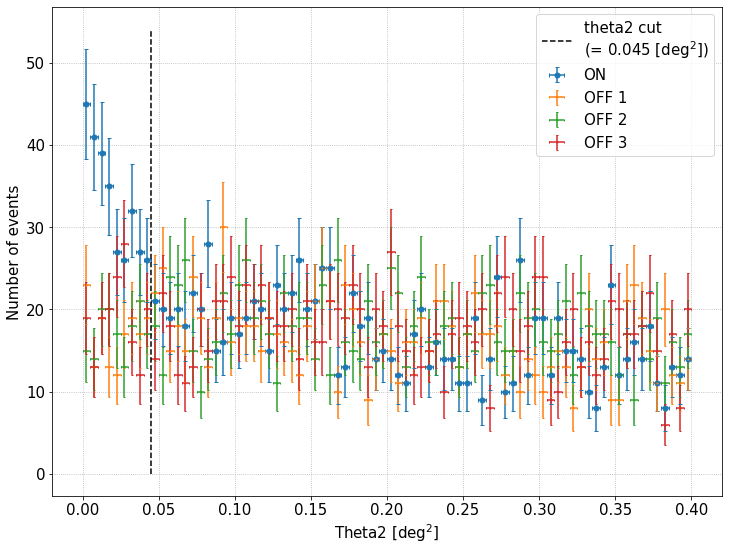


0.158 < E < 0.251 [TeV]
Parameter cuts: (gam, t2) = (0.75, 0.03)
N_on_obs = 528, N_off_obs = 464 (alpha = 0.333), N_exs_obs = 373
Li&Ma significance = 19.0 sigma
--> Flux = 1.3928585528631027e-09 [1 / (cm2 s TeV)]



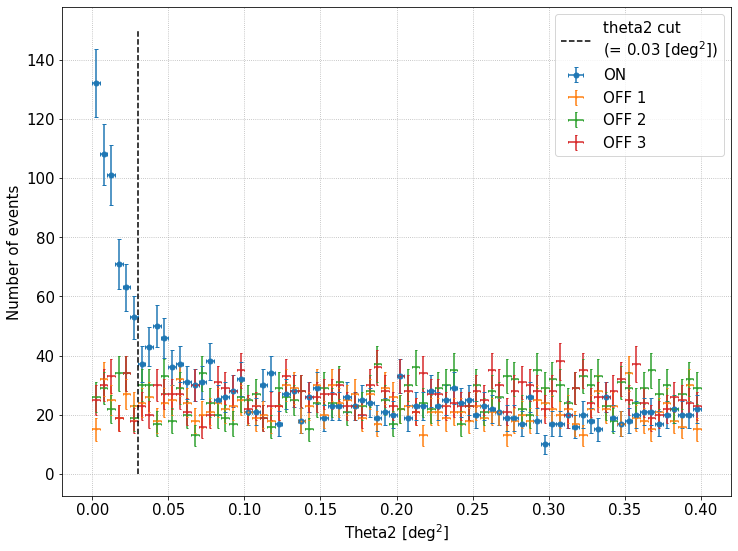


0.251 < E < 0.398 [TeV]
Parameter cuts: (gam, t2) = (0.8, 0.045)
N_on_obs = 430, N_off_obs = 216 (alpha = 0.333), N_exs_obs = 358
Li&Ma significance = 22.2 sigma
--> Flux = 4.872015398223114e-10 [1 / (cm2 s TeV)]



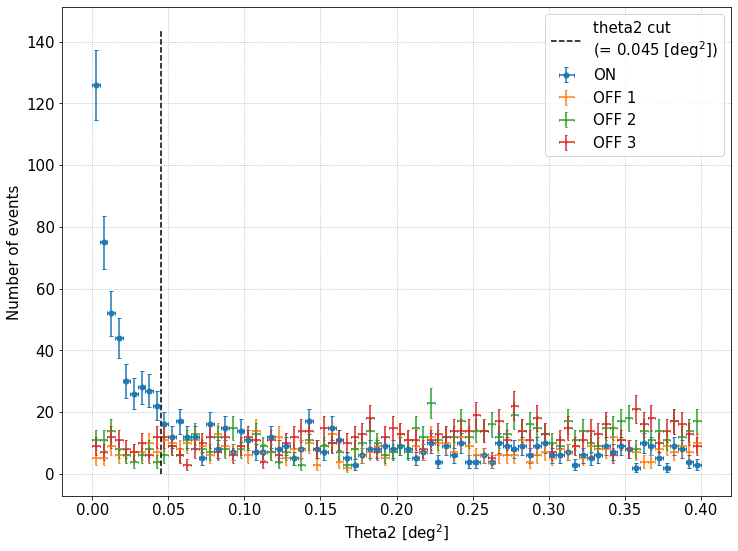


0.398 < E < 0.631 [TeV]
Parameter cuts: (gam, t2) = (0.75, 0.03)
N_on_obs = 252, N_off_obs = 73 (alpha = 0.333), N_exs_obs = 228
Li&Ma significance = 19.9 sigma
--> Flux = 1.4531240128784582e-10 [1 / (cm2 s TeV)]



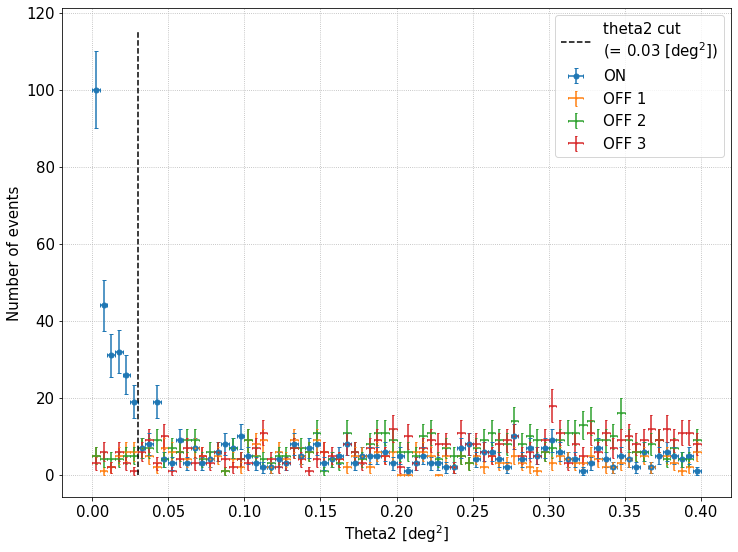


0.631 < E < 1.000 [TeV]
Parameter cuts: (gam, t2) = (0.75, 0.03)
N_on_obs = 185, N_off_obs = 41 (alpha = 0.333), N_exs_obs = 171
Li&Ma significance = 18.0 sigma
--> Flux = 5.2328068275524755e-11 [1 / (cm2 s TeV)]



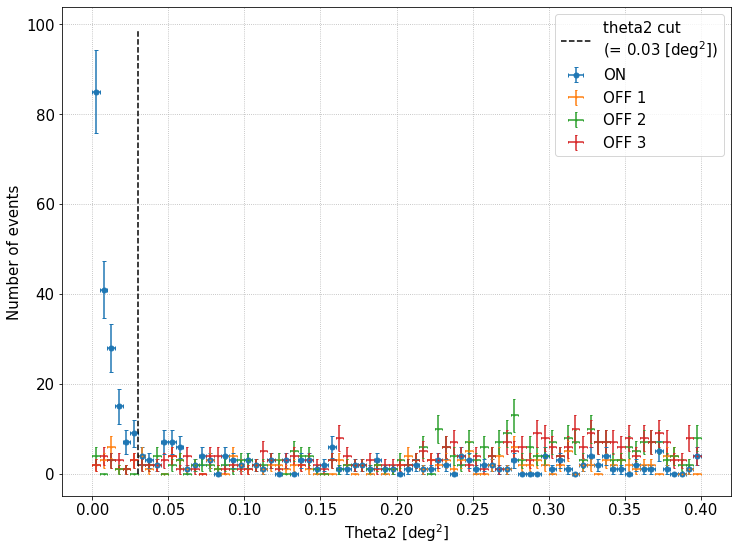


1.000 < E < 1.585 [TeV]
Parameter cuts: (gam, t2) = (0.55, 0.01)
N_on_obs = 94, N_off_obs = 12 (alpha = 0.333), N_exs_obs = 90
Li&Ma significance = 13.9 sigma
--> Flux = 1.6643690962556314e-11 [1 / (cm2 s TeV)]



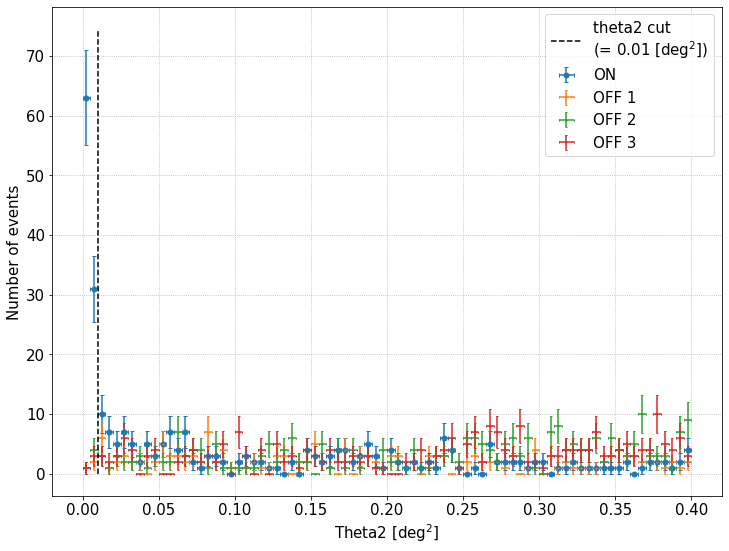


1.585 < E < 2.512 [TeV]
Parameter cuts: (gam, t2) = (0.6, 0.015)
N_on_obs = 44, N_off_obs = 4 (alpha = 0.333), N_exs_obs = 43
Li&Ma significance = 9.8 sigma
--> Flux = 3.864866418968099e-12 [1 / (cm2 s TeV)]



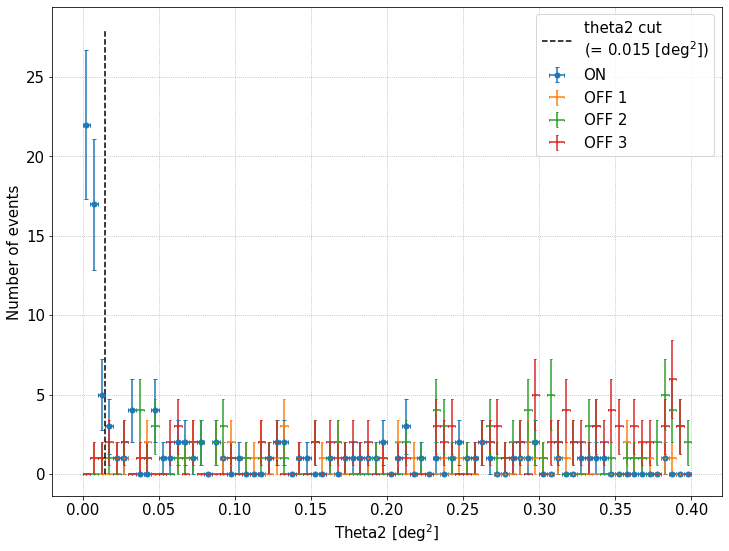


2.512 < E < 3.981 [TeV]
Parameter cuts: (gam, t2) = (0.6, 0.01)
N_on_obs = 18, N_off_obs = 0 (alpha = 0.333), N_exs_obs = 18
Li&Ma significance = 7.1 sigma
--> Flux = 9.743058464580037e-13 [1 / (cm2 s TeV)]



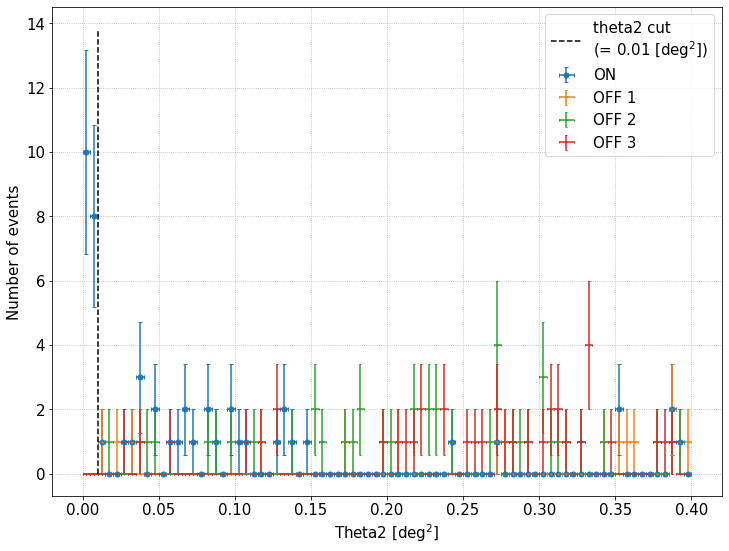


3.981 < E < 6.310 [TeV]
Parameter cuts: (gam, t2) = (0.5, 0.01)
N_on_obs = 14, N_off_obs = 0 (alpha = 0.333), N_exs_obs = 14
Li&Ma significance = 6.2 sigma
--> Flux = 4.417784320529063e-13 [1 / (cm2 s TeV)]



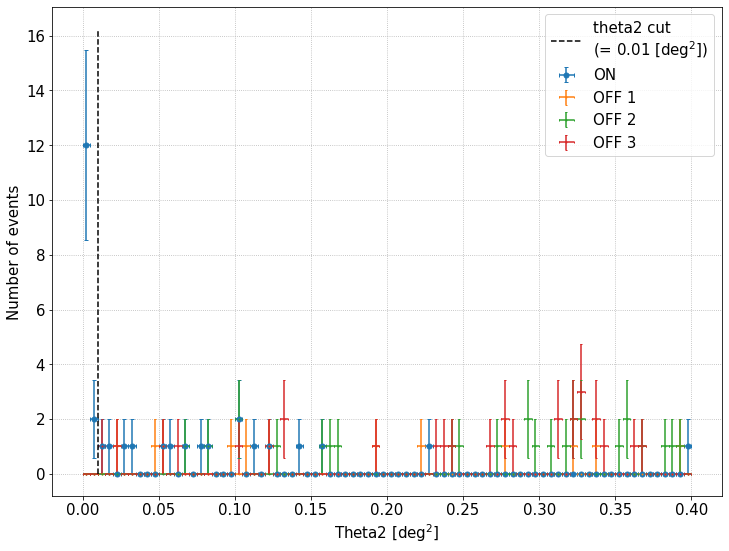


6.310 < E < 10.000 [TeV]
Parameter cuts: (gam, t2) = (0.6, 0.04)
N_on_obs = 7, N_off_obs = 1 (alpha = 0.333), N_exs_obs = 7
Li&Ma significance = 3.7 sigma
--> Flux = 1.168048735911532e-13 [1 / (cm2 s TeV)]



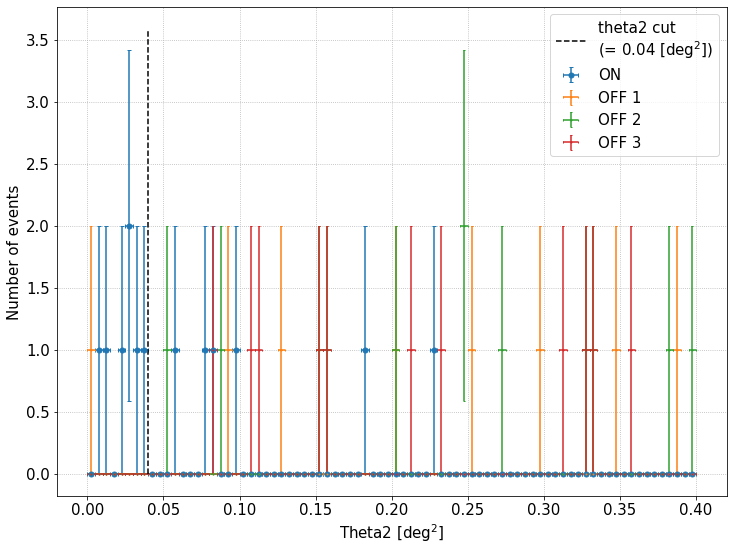

In [15]:
# === settings ===
bins_t2 = np.linspace(0, 0.4, 81)
bins_eng = np.logspace(-1, 1, 11)

gam_cuts_list, t2_cuts_list= get_best_cuts_signif(
    data=dl2_real, bins_eng=bins_eng,
    bins_gam_cut=np.round(np.arange(0.5, 0.91, 0.05), 2), 
    bins_t2_cut=np.round(np.arange(0.01, 0.051, 0.005), 3)
)

# gam_cuts_list = np.repeat(0.7, len(bins_eng))
# t2_cuts_list = np.repeat(0.03, len(bins_eng))

# === main ===
fluxes_list = np.array([])
fluxes_err_list = np.array([])

for i_bin, (eng_lo, eng_hi) in enumerate(zip(bins_eng[:-1], bins_eng[1:])):

    print(f'\n{eng_lo:.3f} < E < {eng_hi:.3f} [TeV]')
    
    gam_cut = gam_cuts_list[i_bin]
    t2_cut = t2_cuts_list[i_bin]
    
    condition = f'(energy_reco_mean > {eng_lo}) & (energy_reco_mean < {eng_hi}) & (event_class_0_mean > {gam_cut})'
    df = dl2_real.query(condition)
    
    n_on_obs = len(df.query(f'(theta2_on < {t2_cut})'))
    n_off_obs = np.sum([len(df.query(f'theta2_off{i_off+1} < {t2_cut}')) for i_off in range(n_off_region)])
    
    alpha = 1/n_off_region
    
    n_exs_obs = n_on_obs - alpha*n_off_obs
    n_exs_obs_err = np.sqrt(n_on_obs + n_off_obs*alpha**2)
    
    stat = WStatCountsStatistic(n_on_obs, n_off_obs, alpha=alpha)
    signif = stat.sqrt_ts

    print(f'Parameter cuts: (gam, t2) = ({gam_cut}, {t2_cut})')
    print(f'N_on_obs = {n_on_obs}, N_off_obs = {n_off_obs} (alpha = {alpha:.3f}), N_exs_obs = {n_exs_obs:.0f}')
    print(f'Li&Ma significance = {signif:.1f} sigma')
    
    nsim = calc_nsim(
        n_events_sim, eslope_sim, emin_sim, emax_sim, cscat_sim, viewcone_sim, 
        emin=eng_lo*u.TeV, emax=eng_hi*u.TeV
    )   

    condition_mc = f'(mc_energy > {eng_lo}) & (mc_energy < {eng_hi}) & ' \
                   f'(event_class_0_mean > {gam_cut}) & (theta2_on < {t2_cut})'
    
    n_events_mc = len(dl2_mc.query(condition_mc))
    
    aeff = (n_events_mc/nsim) * np.pi * cscat_sim**2
    
    flux = n_exs_obs/obs_time/aeff/(eng_hi - eng_lo)/u.TeV
    flux_err = n_exs_obs_err/obs_time/aeff/(eng_hi - eng_lo)/u.TeV
    
    fluxes_list = np.append(fluxes_list, flux.value)
    fluxes_err_list = np.append(fluxes_err_list, flux_err.value)
    
    print(f'--> Flux = {flux.value} [{flux.unit}]\n')

    # --- check theta2 distributions ---
    pyplot.figure()
    pyplot.xlabel('Theta2 [deg$^2$]')
    pyplot.ylabel('Number of events')

    hist_on, _ = np.histogram(df['theta2_on'].values, bins_t2)

    bins_center = (bins_t2[:-1] + bins_t2[1:])/2
    x_err = [bins_center - bins_t2[:-1], bins_t2[1:] - bins_center]

    pyplot.errorbar(
        x=bins_center, xerr=x_err, y=hist_on, yerr=np.sqrt(hist_on), 
        fmt='o', capsize=2, markersize=5, label='ON'
    )

    for i_off in range(n_off_region):

        hist_off, _ = np.histogram(df[f'theta2_off{i_off+1}'].values, bins_t2)

        pyplot.errorbar(
            x=bins_center, xerr=x_err, y=hist_off, yerr=np.sqrt(hist_off), 
            fmt='o', capsize=1, markersize=1, label=f'OFF {i_off+1}'
        )

    ylim = pyplot.ylim() 

    pyplot.plot(
        (t2_cut, t2_cut), (0, ylim[1]), 
        linestyle='--', color='black', label=f'theta2 cut\n(= {t2_cut} [deg$^2$])'
    )

    pyplot.grid()
    pyplot.legend()
    
    pyplot.show()
    pyplot.close()
    

### Crab spectrum:

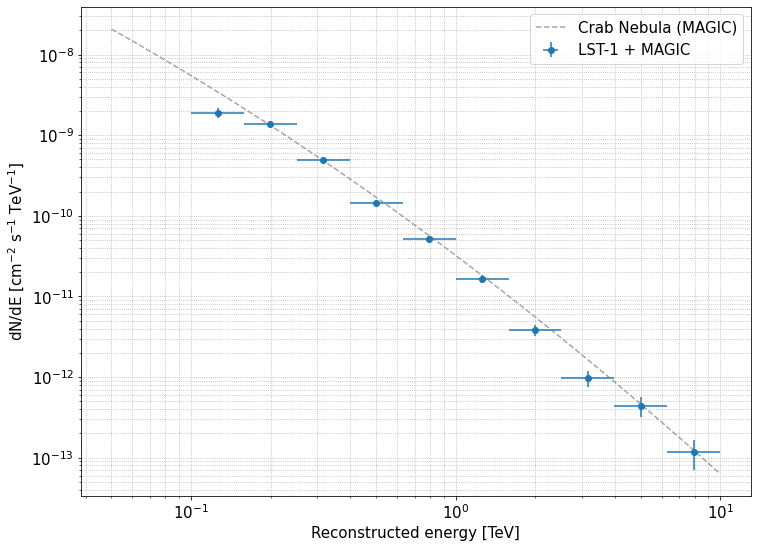

In [16]:
pyplot.figure()
pyplot.xlabel('Reconstructed energy [TeV]')
pyplot.ylabel('dN/dE [cm$^{-2}$ s$^{-1}$ TeV$^{-1}$]')
pyplot.loglog()

bins_center = np.sqrt(bins_eng[:-1] * bins_eng[1:])
bins_err = [bins_center - bins_eng[:-1], bins_eng[1:] - bins_center]

bins_magic = np.logspace(np.log10(5e-2), 1, 101)

pyplot.errorbar(
    x=bins_center, xerr=bins_err, y=fluxes_list, yerr=fluxes_err_list,
    marker='o', linestyle='None', label='LST-1 + MAGIC'
)

pyplot.plot(
    bins_magic, crab_magic(bins_magic*u.TeV).value,
    linestyle='--', color='grey', label='Crab Nebula (MAGIC)', alpha=0.7
)

pyplot.grid(which='both')
pyplot.legend()

### Crab SED:

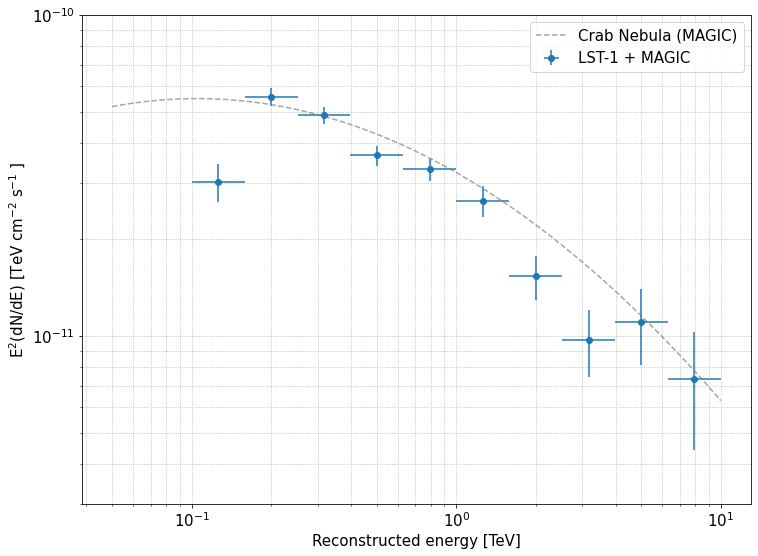

In [17]:
pyplot.figure()
pyplot.xlabel('Reconstructed energy [TeV]')
pyplot.ylabel('E$^2$(dN/dE) [TeV cm$^{-2}$ s$^{-1}$ ]')
pyplot.ylim(3e-12, 1e-10)
pyplot.loglog()

sed_list = fluxes_list * bins_center**2 
sed_err_list = fluxes_err_list * bins_center**2

pyplot.errorbar(
    x=bins_center, xerr=bins_err, y=sed_list, yerr=sed_err_list,
    marker='o', linestyle='None', label='LST-1 + MAGIC'
)

pyplot.plot(
    bins_magic, bins_magic**2 * crab_magic(bins_magic*u.TeV).value,
    linestyle='--', color='grey', label='Crab Nebula (MAGIC)', alpha=0.7
)

pyplot.grid(which='both')
pyplot.legend()